# WeatherPy
----

#### Analysis
* The weather becomes warmer when appraoching the equator
* There's not relationship between latitude and cloudiness

In [1]:
# ---Dependencies and Setup--- #
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# ---Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# ---Output File (CSV)
output_data_file = "output_data/cities.csv"

# ---Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : urucara
Processing Record 2 of Set 1 : ponta do sol
Processing Record 3 of Set 1 : cherskiy
Processing Record 4 of Set 1 : qaanaaq
City not found. Skipping...
Processing Record 5 of Set 1 : port alfred
Processing Record 6 of Set 1 : albany
Processing Record 7 of Set 1 : bengkulu
Processing Record 8 of Set 1 : churachandpur
Processing Record 9 of Set 1 : san patricio
Processing Record 10 of Set 1 : gombe
Processing Record 11 of Set 1 : hobart
Processing Record 12 of Set 1 : tommot
Processing Record 13 of Set 1 : panalingaan
Processing Record 14 of Set 1 : husavik
Processing Record 15 of Set 1 : tasiilaq
Processing Record 16 of Set 1 : ushuaia
Processing Record 17 of Set 1 : siemiatycze
Processing Record 18 of Set 1 : rikitea
Processing Record 19 of Set 1 : mataura
Processing Record 20 of Set 1 : yellowknife
Processing Record 21 of Set 1 : east london
Processing Record 22 of Set 1 : kununurra
Processin

Processing Record 36 of Set 4 : barrow
Processing Record 37 of Set 4 : baculin
Processing Record 38 of Set 4 : inhambane
Processing Record 39 of Set 4 : andenes
City not found. Skipping...
Processing Record 40 of Set 4 : chongwe
Processing Record 41 of Set 4 : muros
Processing Record 42 of Set 4 : hervey bay
Processing Record 43 of Set 4 : mount gambier
Processing Record 44 of Set 4 : novoagansk
Processing Record 45 of Set 4 : meulaboh
Processing Record 46 of Set 4 : santa rosalia
Processing Record 47 of Set 4 : vangaindrano
Processing Record 48 of Set 4 : cantaura
City not found. Skipping...
Processing Record 49 of Set 4 : tadine
City not found. Skipping...
City not found. Skipping...
Processing Record 50 of Set 4 : lensk
Processing Record 0 of Set 5 : puerto colombia
Processing Record 1 of Set 5 : mango
Processing Record 2 of Set 5 : huai yot
Processing Record 3 of Set 5 : senica
Processing Record 4 of Set 5 : vila velha
Processing Record 5 of Set 5 : tabas
Processing Record 6 of Set

Processing Record 17 of Set 8 : michalovce
Processing Record 18 of Set 8 : piriyapatna
Processing Record 19 of Set 8 : kahului
Processing Record 20 of Set 8 : grand gaube
Processing Record 21 of Set 8 : kirakira
Processing Record 22 of Set 8 : ozark
Processing Record 23 of Set 8 : shirokiy
Processing Record 24 of Set 8 : iguape
Processing Record 25 of Set 8 : panaba
Processing Record 26 of Set 8 : rypefjord
Processing Record 27 of Set 8 : nelson bay
Processing Record 28 of Set 8 : kamaishi
Processing Record 29 of Set 8 : zyryanka
Processing Record 30 of Set 8 : mae hong son
Processing Record 31 of Set 8 : itupeva
Processing Record 32 of Set 8 : mullheim
Processing Record 33 of Set 8 : port hardy
Processing Record 34 of Set 8 : kota belud
City not found. Skipping...
Processing Record 35 of Set 8 : lukovetskiy
Processing Record 36 of Set 8 : kavaratti
Processing Record 37 of Set 8 : balykshi
Processing Record 38 of Set 8 : ormara
Processing Record 39 of Set 8 : maceio
Processing Record 4

Processing Record 0 of Set 12 : anenecuilco
Processing Record 1 of Set 12 : alekseyevka
Processing Record 2 of Set 12 : lazaro cardenas
Processing Record 3 of Set 12 : galveston
Processing Record 4 of Set 12 : soe
Processing Record 5 of Set 12 : alta
Processing Record 6 of Set 12 : armidale
Processing Record 7 of Set 12 : vohibinany
Processing Record 8 of Set 12 : chifeng
Processing Record 9 of Set 12 : tulu bolo
Processing Record 10 of Set 12 : stokke
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a panda data frame using data retrieved
city_data_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list  
})
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Urucará,-2.5364,-57.7600,75.58,97,100,1.19,BR,1612924543
1,Ponta do Sol,32.6667,-17.1000,57.99,71,69,1.99,PT,1612924543
2,Cherskiy,68.7500,161.3000,-2.94,85,0,1.88,RU,1612924388
3,Qaanaaq,77.4840,-69.3632,14.43,79,0,7.02,GL,1612924544
4,Port Alfred,-33.5906,26.8910,68.00,94,2,2.77,ZA,1612924544


In [5]:
city_data_df.describe(include = "all")

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,571,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571,5.710000e+02
unique,571,NaN,NaN,NaN,NaN,NaN,NaN,119,NaN
top,Ambovombe,NaN,NaN,NaN,NaN,NaN,NaN,RU,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,65,NaN
mean,NaN,19.643598,16.012100,49.592627,74.548161,52.980736,7.536322,NaN,1.612925e+09
std,NaN,32.863723,89.696791,31.468514,19.030881,40.106586,5.810483,NaN,7.731050e+01
min,NaN,-54.800000,-179.166700,-38.200000,13.000000,0.000000,0.180000,NaN,1.612924e+09
25%,NaN,-6.766650,-64.057600,27.135000,65.000000,5.000000,3.440000,NaN,1.612925e+09
50%,NaN,22.813400,19.234500,61.930000,79.000000,68.000000,5.750000,NaN,1.612925e+09
75%,NaN,47.082100,95.755900,74.605000,89.000000,92.000000,10.180000,NaN,1.612925e+09


In [6]:
#Export the city data into a .csv

city_data_df.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# --- find cities that have humidity over 100% ---
humidity_over_100 = city_data_df.loc[city_data_df["Humidity"] > 100, :]

if humidity_over_100.empty == True:
    print("There are no cities with humidity values over 100%")
    print("Using original dataframe to continue with plotting...")
    
# --- extract relevant fields from the data frame for plotting ---
    latitudes = city_data_df["Lat"]
    temperatures = city_data_df["Max Temp"]
    humidity = city_data_df["Humidity"]
    cloudiness = city_data_df["Cloudiness"]
    windspeed = city_data_df["Wind Speed"]
    
else:
    # -- get the indices of cities that have humidity over 100% ---
    Humidityover100Index = humidity_over_100.index
    
    # --- create a clean DataFrame by dropping all humidity outliers by index found above ---
    clean_city_data = city_data_df.drop(Humidityover100Index).reset_index(drop=True)
    clean_city_data.head()
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = clean_city_data["Lat"]
    temperatures = clean_city_data["Max Temp"]
    humidity = clean_city_data["Humidity"]
    cloudiness = clean_city_data["Cloudiness"]
    windspeed = clean_city_data["Wind Speed"]

    # --- export the new dataframe into a csv ---
    clean_city_data.to_csv("../output_data/clean_city_data.csv", index=True, index_label="City ID", header=True)  
    

There are no cities with humidity values over 100%
Using original dataframe to continue with plotting...


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

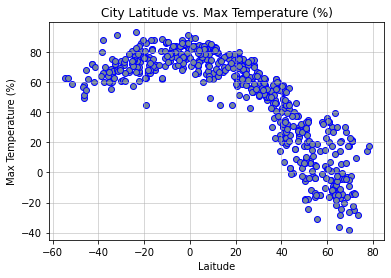

In [8]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "lightslategrey", edgecolor = "blue")

# Set title
plt.title("City Latitude vs. Max Temperature (%)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Max Temperature.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

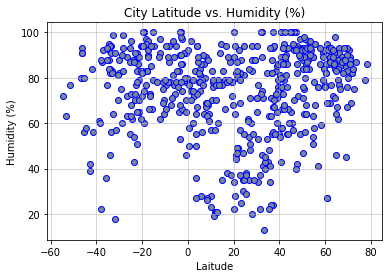

In [9]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "lightslategrey", edgecolor = "blue")

# Set title
plt.title("City Latitude vs. Humidity (%)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Humidity.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/Images/City Latitude vs Humidity.png")


## Latitude vs. Cloudiness Plot

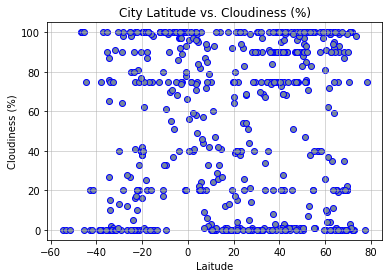

In [10]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "lightslategrey", edgecolor = "blue")

# Set title
plt.title("City Latitude vs. Cloudiness (%)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Cloudiness.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

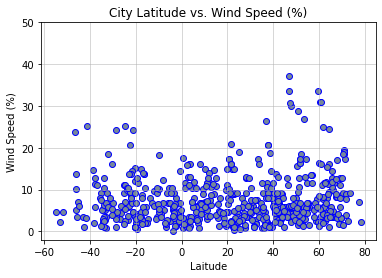

In [11]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "lightslategrey", edgecolor = "blue")
plt.title("City Latitude vs. Wind Speed (%)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Wind Speed.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

# Define function for creating linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    #plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/City Latitude vs Humidity.png")
    #plt.savefig("D:/UTSA/Github/python-api-challenge/Images/City Latitude vs Humidity2.png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.89


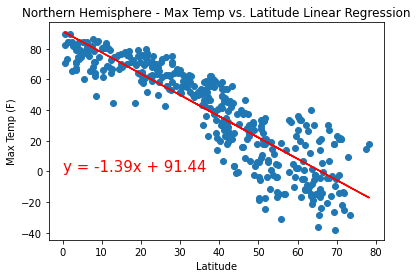

In [13]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.59


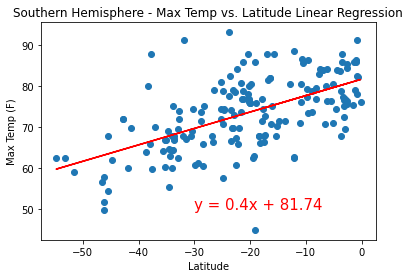

In [14]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
#plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.31


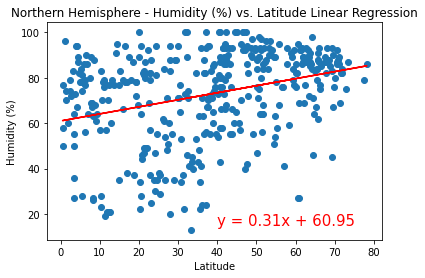

In [15]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.17


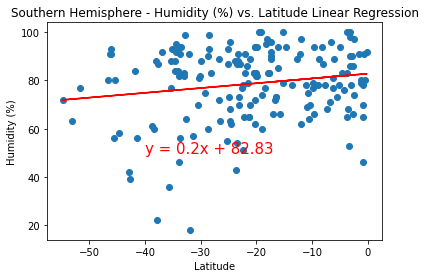

In [16]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.08


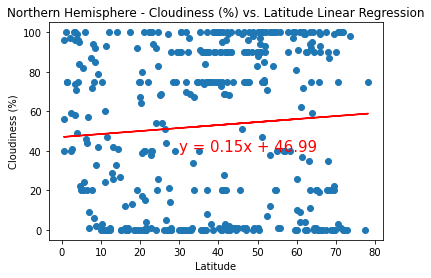

In [17]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.37


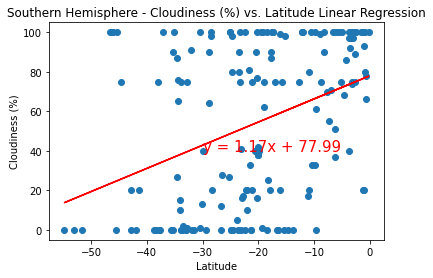

In [18]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
#plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.13


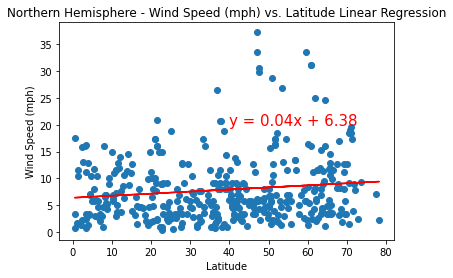

In [19]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.14


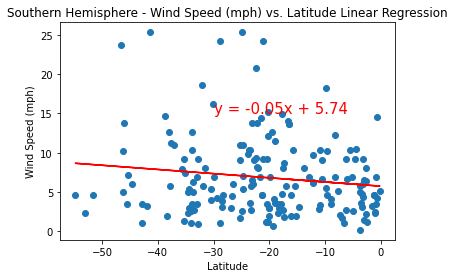

In [20]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
#plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")